In [1]:
import glob
import joblib

In [2]:
from utils import convert_episodes_to_traj_class

In [3]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

In [15]:
from decision_bias_analysis_tools import ComputeFourBiasClips2
from parameters import EXPLORE, HOME_NODE, UnrewNamesSub
import evaluation_metrics as em
import parameters as p

In [10]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.size"] = 18

In [6]:
figpath = '/Users/us3519/mouse-maze/figs/paper figs/figure_results'

In [11]:
def load(model_name):
    if model_name == 'Animals':
        tfs = [LoadTrajFromPath(f'../outdata/{_}-tf') for _ in UnrewNamesSub]
        return tfs

    if model_name == 'BiasedWalk4':
        tfs = [LoadTrajFromPath(f'../../../newrosenberg/outdata/{_}-RW5-tf') for _ in UnrewNamesSub]
        return tfs
    
#     if model_name == 'RandomWalk':
#         tfs = [LoadTrajFromPath('../outdata/rw01-tf')]
#         return tfs
    
#     if model_name == 'MarkovChain':
#         tfs = [LoadTrajFromPath(f'../../Rosenberg-2021-Repository/outdata/{_}-MarkovSim-tf') for _ in UnrewNamesSub]
#         return tfs

    tfs = []
    for f in glob.glob(f'/Users/us3519/mouse-maze/figs/may28/{model_name}/MAX_LENGTH=50000/**/episodes_*.pkl'):
        s = joblib.load(f)
        tf = convert_episodes_to_traj_class(s["episodes_positions"], s["episodes_states"])
        tfs.append(tf)
    return tfs

In [650]:
def get_biases(tfs):
    bi = np.array([ComputeFourBiasClips2(tf,ma,SplitModeClips(tf,ma),mode=EXPLORE)[0] for tf in tfs]) # bias using exploration only
    return bi

In [31]:
ma=NewMaze()

In [32]:
bi_altoptions = get_biases(load('TeAltOptions'))

In [33]:
bi_biasedwalk = get_biases(load('BiasedWalk'))

In [34]:
# bi_markov = get_biases(load('MarkovChain'))

In [57]:
bi_uncertainty = get_biases(load('Uncertainty'))

In [35]:
bi_animals = get_biases(load('Animals'))

In [36]:
bi_randomwalk = np.array([[2/3, 1/2, 2/3, 1/2]])

In [8]:
model_colors = {
    'Animals': 'r',
    'TeAltOptions': 'g',
    'BiasedWalk4': 'y',
    'Uncertainty': 'tab:pink',
    'RandomWalk': 'b',
#     'MarkovChain': 'k',
#     'Optimal': 'k:',
}

In [9]:
labels = {
    'Animals':      'Animals',
    'TeAltOptions': '$\epsilon$$z$-Greedy',
    'BiasedWalk4':  'Biased Walk',
    'Uncertainty':  'Uncertainty',
    'RandomWalk':   'random',
    'Optimal':      'optimal',
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


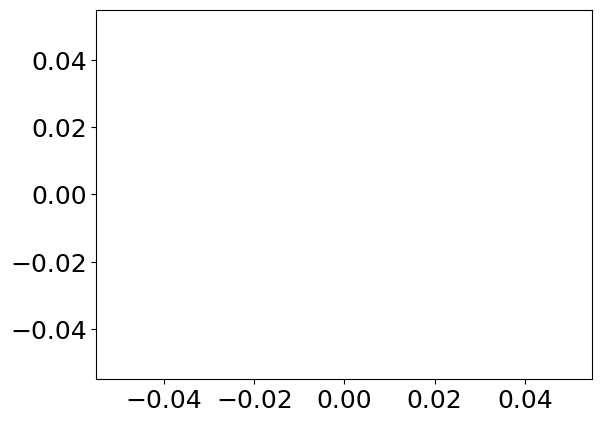

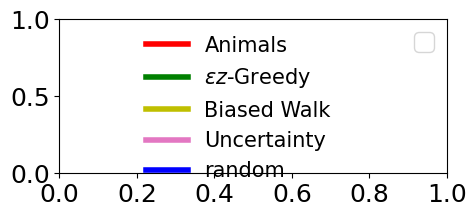

In [1174]:
# create a dummy plot to get legend handles
fig, ax = plt.subplots()
lines = []

for model_name in model_colors:
    lines.append(ax.plot([], [], model_colors[model_name], linewidth=4, label=labels[model_name])[0])

fig_legend = plt.figure(figsize=(5, 2))
fig_legend.legend(handles=lines, labels=[line.get_label() for line in lines], fontsize='small', loc='center', frameon=False)
fig_legend.tight_layout()
fig_legend.savefig(f'{figpath}/legend_only.pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.legend()
plt.show()  # it saves the correct legend but does not show in jupyter notebook

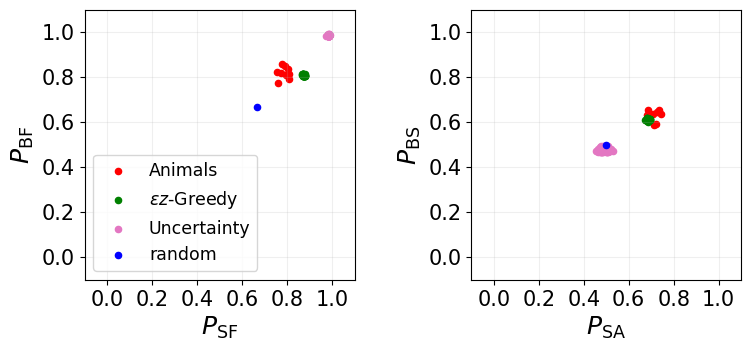

In [1175]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.8))

s = 20
alpha = 1
ax[0].scatter(bi_animals[:,0], bi_animals[:,2], c=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[0].scatter(bi_altoptions[:,0], bi_altoptions[:,2], c=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[0].scatter(bi_uncertainty[:,0], bi_uncertainty[:,2], c=model_colors["Uncertainty"], label=labels['Uncertainty'], s=s, alpha=alpha,)
ax[0].scatter(bi_randomwalk[:,0], bi_randomwalk[:,2], c=model_colors["RandomWalk"], label=labels['RandomWalk'],s=s, alpha=1,)

ax[1].scatter(bi_animals[:,1], bi_animals[:,3], c=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[1].scatter(bi_altoptions[:,1], bi_altoptions[:,3], c=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[1].scatter(bi_uncertainty[:,1], bi_uncertainty[:,3], c=model_colors["Uncertainty"], label=labels['Uncertainty'], s=s, alpha=alpha,)
ax[1].scatter(bi_randomwalk[:,1], bi_randomwalk[:,3], c=model_colors["RandomWalk"], label=labels['RandomWalk'], s=s, alpha=1,)


for _ in ax:
    _.tick_params(axis='both', labelsize='small')
    _.set_aspect('equal')
    _.set_xlim([-0.1,1.1])
    _.set_ylim([-0.1,1.1])
    _.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.grid(alpha=0.2)

ax[0].legend(loc='lower left', fontsize='x-small') 
# ax[1].legend(loc='lower left', fontsize='x-small') 
ax[0].set_xlabel('$P_{\mathrm{SF}}$', fontsize='medium')
ax[0].set_ylabel('$P_{\mathrm{BF}}$', fontsize='medium')
ax[1].set_xlabel('$P_{\mathrm{SA}}$', fontsize='medium')
ax[1].set_ylabel('$P_{\mathrm{BS}}$', fontsize='medium')


plt.tight_layout()
plt.savefig(f'{figpath}/decisionbiases.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [860]:
np.mean(bi_altoptions[:,0][:9])/np.mean(bi_animals[:,0][:9])

1.111542899840761

In [859]:
np.mean(bi_altoptions[:,1][:9])/np.mean(bi_animals[:,1][:9])

0.9663558371657861

In [861]:
np.mean(bi_altoptions[:,2][:9])/np.mean(bi_animals[:,2][:9])

0.9861720105247416

In [862]:
np.mean(bi_altoptions[:,3][:9])/np.mean(bi_animals[:,3][:9])

0.9690498048973005

In [624]:
def get_expeff(tfs, le=6):
    y_tfs = []
    for tf in tfs:
        wcn=NewNodesMerge3(tf,ma,le) 
        x=wcn[1]
        y=wcn[2]
        y_tfs.append(y)

    min_len = min(len(_) for _ in y_tfs)
    y_tfs = np.array([_[:min_len] for _ in y_tfs])  # some tfs might not have all window sizes
    y_mu = np.mean(y_tfs, axis=0)
    y_std = np.std(y_tfs, axis=0)
    return x[:min_len], y_tfs, y_mu, y_std

In [196]:
def get_markov_expeff(le=6):
    
    def MarkovEff4(nickname, le):
        '''
        Computes curve of new nodes vs all nodes from the Markov simulation of mouse nickname.
        '''
        tf=LoadTrajFromPath(f'../../Rosenberg-2021-Repository/outdata/{nickname}-MarkovSim-tf')
        da=tf.no[0][:-1,0] # the node sequence minus the exit state at the end
        ns=da[(da>=2**le-1) & (da<2**(le+1)-1)] # restrict the node sequence to the end nodes
        wcn=NewNodes4(ns) # compute new nodes vs all nodes
        return wcn

    y_tfs = []
    for nickname in UnrewNamesSub:
        wcn=MarkovEff4(nickname, le)
        x=wcn[1]
        y=wcn[2]
        y_tfs.append(y)

    min_len = min(len(_) for _ in y_tfs)
    y_tfs = np.array([_[:min_len] for _ in y_tfs])  # some tfs might not have all window sizes
    y_mu = np.mean(y_tfs, axis=0)
    y_std = np.std(y_tfs, axis=0)
    return x[:min_len], y_tfs, y_mu, y_std

In [478]:
def get_ee(le):
    ee_dict = {}
    for model_name in model_colors:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        tfs = load(model_name)[:30]
        print("len(tfs)", len(tfs))
        ee_dict[model_name] = get_expeff(tfs, le=le)
    return ee_dict

In [1192]:
def plot_ee(exp_eff_dict, le, mnames, figsize=(8, 4), axhline=32, axvline=100, xlim=(2, 2*(10**3)), ylim=(0, 2**6+2), labelpad=10):
    x_dfs=list(range(1, (2**le)+1))
    y_dfs=list(range(1, (2**le)+1))

    plt.figure(figsize=figsize)
    ax = plt.gca()

    for model_name in mnames:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        x, _, y_mu, y_std = exp_eff_dict[model_name]
        linewidth = 3 if model_name == 'Animals' else 1
        alpha = 1
        label = labels[model_name]
        if model_name == 'RandomWalk':
            linewidth = 0.5
            alpha = 0.8
        plt.plot(x, y_mu, c=model_colors[model_name], linestyle='-',linewidth=linewidth, label=label, alpha=alpha)
        if model_name != 'RandomWalk':
            ax.fill_between(x, y_mu+y_std, y_mu-y_std, color=model_colors[model_name], alpha=0.2)

    plt.plot(x_dfs,y_dfs,'k',linewidth=0.7, alpha=0.4, label='optimal')

    plt.axhline(axhline, ls=':', c='k', lw=1)
    plt.axvline(axvline, ls=':', c='k', lw=1)
    # plt.axhline(2**(le), ls=':', c='k')
    plt.legend(loc='lower right', fontsize='x-small')
    ax.tick_params(axis='both', labelsize='small')
    ax.set_xlabel(f'Nodes visited (Level {le})', fontsize='medium')
    ax.set_ylabel(f'New nodes found\n(Level {le})', fontsize='medium', labelpad=labelpad)
    plt.xscale('log')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.savefig(f'{figpath}/expeff_le={le}_data.pdf', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

Animals
TeAltOptions
BiasedWalk4
Uncertainty
RandomWalk


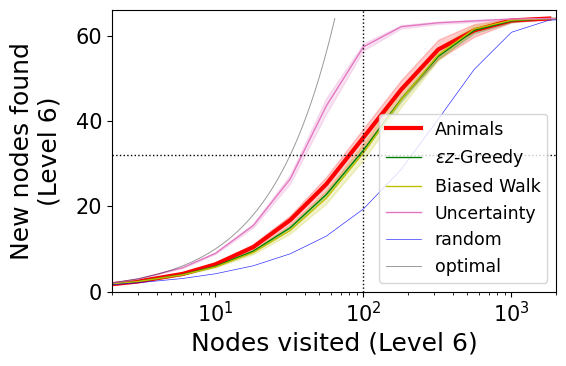

In [1193]:
# exp_eff_dict6 = get_ee(6)
plot_ee(exp_eff_dict6, 6, mnames=['Animals', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty', 'RandomWalk'], figsize=(6, 4))

Animals
TeAltOptions
BiasedWalk4
Uncertainty
RandomWalk


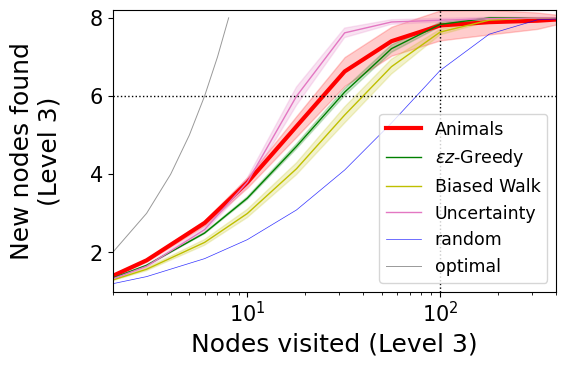

In [1194]:
# exp_eff_dict3 = get_ee(3)
plot_ee(exp_eff_dict3, 3, mnames=['Animals', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty', 'RandomWalk'], figsize=(6, 4), axhline=6, xlim=(2, 400), ylim=(1, 2**3+0.2), labelpad=20)

Animals
TeAltOptions
BiasedWalk4
Uncertainty
RandomWalk


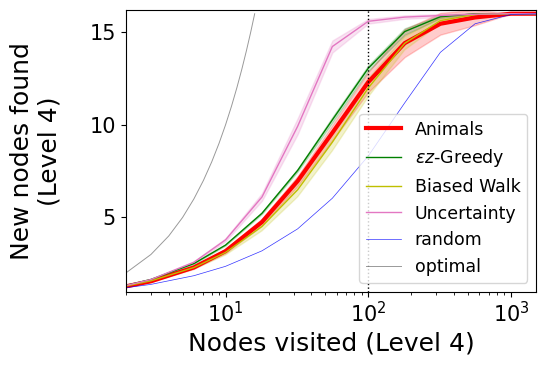

In [1196]:
# exp_eff_dict4 = get_ee(4)
plot_ee(exp_eff_dict4, 4, mnames=['Animals', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty', 'RandomWalk'], figsize=(6, 4), xlim=(2, 1500), ylim=(1, 2**4+0.2), labelpad=20)

Animals
TeAltOptions
BiasedWalk4
Uncertainty
RandomWalk


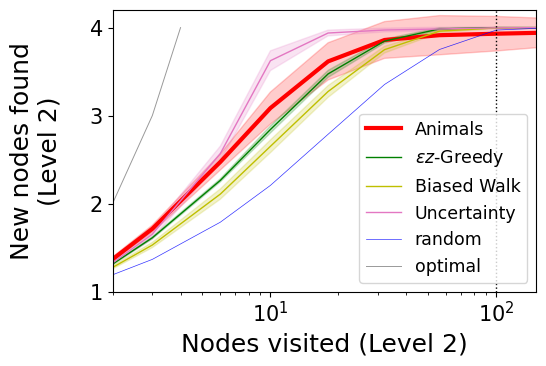

In [1197]:
# exp_eff_dict2 = get_ee(2)
plot_ee(exp_eff_dict2, 2, mnames=['Animals', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty', 'RandomWalk'], figsize=(6, 4), xlim=(2, 150), ylim=(1, 2**2+0.2), labelpad=20)

Animals
RandomWalk


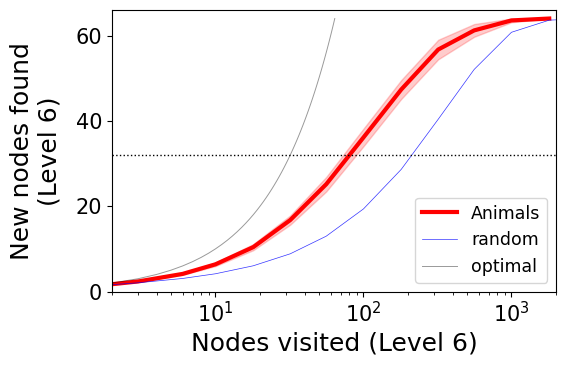

In [791]:
# exp_eff_dict6 = get_ee(6)
# plot_ee({'Animals': exp_eff_dict6['Animals'], 'RandomWalk': exp_eff_dict6['RandomWalk']}, 6, figsize=(6, 4))

In [1111]:
def func6(x, a, b): # the 2-parameter fit function for level 6
    z=x/a
    return 64*(1-1/(1+(z+b*z**3)/(1+b)))

def get_ee_curve6(ee_dict, le):
    assert le in [6]
    f = func6
    N = 32
    effs = {}
    for model_name in ee_dict:
        print(model_name)
        plot_ = True if model_name in ['BiasedWalk4', 'Animals'] else False
        x, ytfs, y_mu, y_std = ee_dict[model_name]
        effs[model_name] = []
        print(x)
        for ytf in ytfs:
            a=70
            b=0.1
            ydata=ytf
            popt, pcov = curve_fit(f, x, ydata, p0=[a,b])
            eff = N/popt[0]
            print(f"func value a={popt[0]} b={popt[1]} eff={eff}") # a is the number required to survey half nodes.
#             print("true vs predict", list(zip(ydata, f(x, popt[0], popt[1]))))
#             if plot_:
#                 plt.figure(figsize=(4, 3))
#                 plt.plot(x, ydata, color=model_colors[model_name], linestyle='-', label='empirical')
#                 plt.plot(x, f(x, popt[0], popt[1]), c='gray', marker='o', lw=0, label='prediction')
#                 plt.axhline(N, ls=':', c=model_colors['RandomWalk'], lw=2)
#                 plt.legend(loc='lower right', fontsize='x-small')
#                 plt.xscale('log')
#                 plt.ylim(1, 2**le+1)
#                 plt.show()
#                 plt.close()
            effs[model_name].append(eff)
        effs[model_name] = np.array(effs[model_name])
        print(model_name, f'mean={np.mean(effs[model_name])} std={np.std(effs[model_name])}')
    return effs

Animals
[   2.    3.    6.   10.   18.   32.   56.  100.  180.  320.  560. 1000.
 1800.]
func value a=73.77959084043972 b=0.09929520629706887 eff=0.4337242811390099


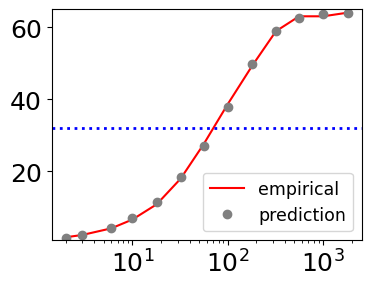

func value a=78.01715928023577 b=0.07904587247906991 eff=0.4101661774822737


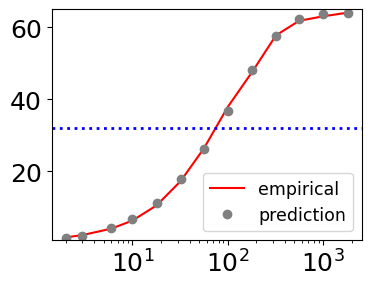

func value a=89.71724643932951 b=0.025222282138721127 eff=0.3566761271662491


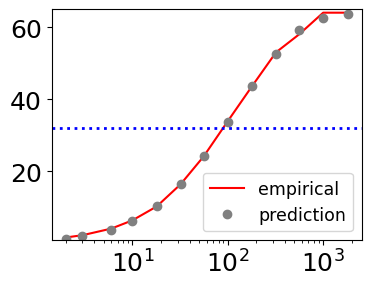

func value a=79.5268890921052 b=0.05307988492006069 eff=0.4023796273853834


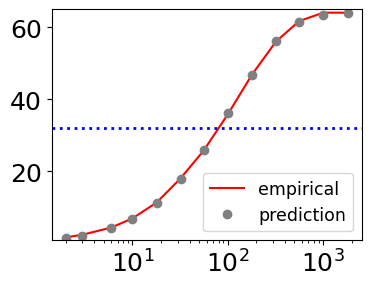

func value a=77.87597940279464 b=0.11409136545530621 eff=0.41090975992080625


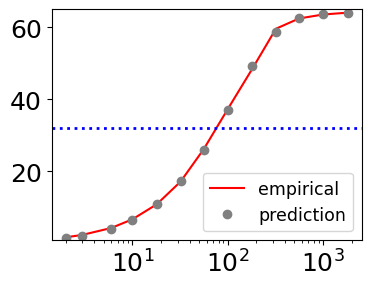

func value a=78.67710813297873 b=0.15508917909194606 eff=0.4067256761129824


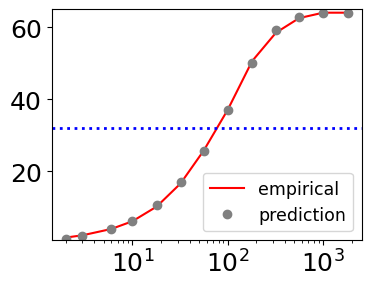

func value a=78.27767017038443 b=0.11200060245317948 eff=0.40880112975190314


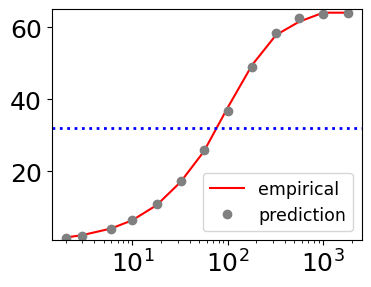

func value a=90.6597449842261 b=0.0968797990229641 eff=0.3529681227932826


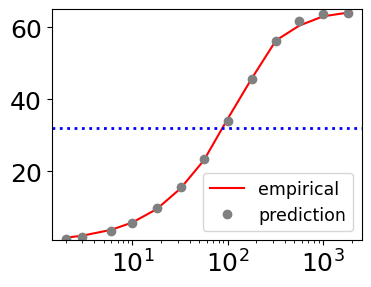

func value a=99.70742599642094 b=0.06710547173696453 eff=0.3209389840346361


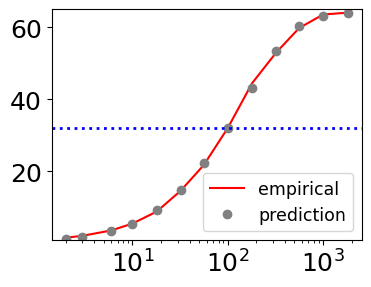

Animals mean=0.3892544317540585 std=0.034622492591246314
TeAltOptions
[2.000e+00 3.000e+00 6.000e+00 1.000e+01 1.800e+01 3.200e+01 5.600e+01
 1.000e+02 1.800e+02 3.200e+02 5.600e+02 1.000e+03 1.800e+03 3.200e+03
 5.600e+03 8.434e+03]
func value a=96.13061631911027 b=0.09868478372571943 eff=0.3328804206744544
func value a=94.72643692565312 b=0.09392076101251279 eff=0.3378148808142703
func value a=94.07907850052804 b=0.09155620713034657 eff=0.34013938603597604
func value a=92.99245462348406 b=0.09165849393975786 eff=0.34411394052952343
func value a=93.28312173319222 b=0.11116226875835787 eff=0.34304169291767694
func value a=94.97703648066751 b=0.08314042079932196 eff=0.3369235468461218
func value a=92.67593453791149 b=0.11060367937032912 eff=0.3452892075980046
func value a=93.78365618225538 b=0.09878133869143375 eff=0.3412108388887344
func value a=96.39503100336356 b=0.09047210068487846 eff=0.3319673189262568
func value a=96.22124919535504 b=0.08042739174522294 eff=0.33256687340476515
fu

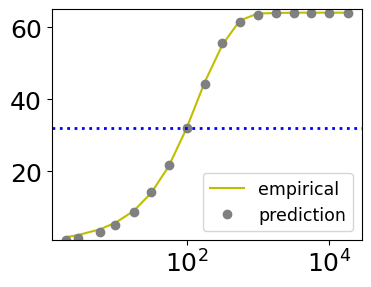

func value a=94.5889283527005 b=0.11737780130534199 eff=0.3383059789056845


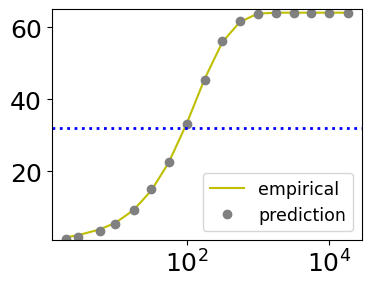

func value a=90.67247625557671 b=0.1126906807204769 eff=0.3529185627378504


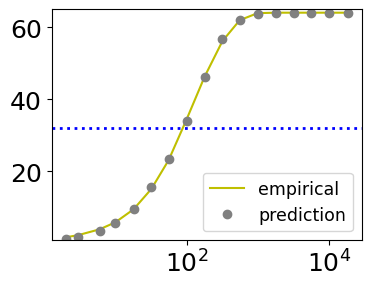

func value a=86.76602871331666 b=0.13558868577692895 eff=0.3688079364071288


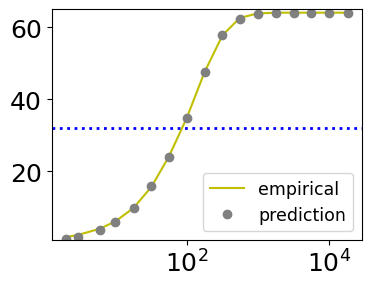

func value a=90.81898716231134 b=0.11380611285178238 eff=0.3523492278416376


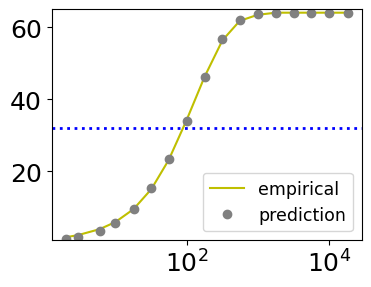

func value a=96.6919437393599 b=0.15994841690062916 eff=0.33094794418714246


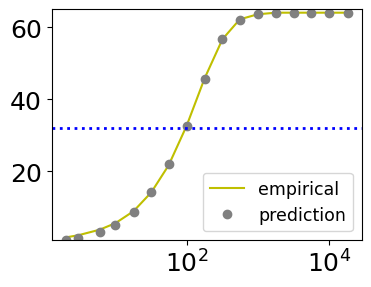

func value a=98.30653889094808 b=0.10907309834055894 eff=0.32551242634528876


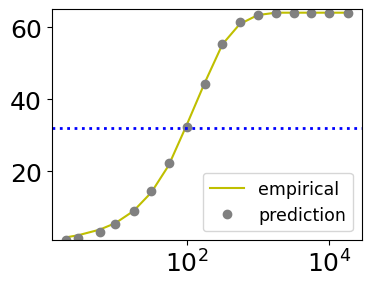

func value a=118.8275154340109 b=0.11830155278476744 eff=0.2692978968980524


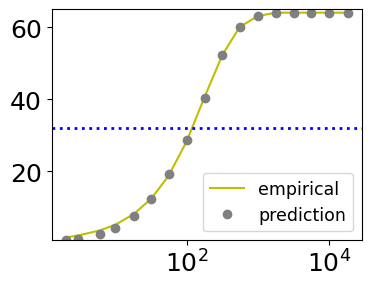

func value a=106.89428190382513 b=0.12802946160263204 eff=0.2993611952863019


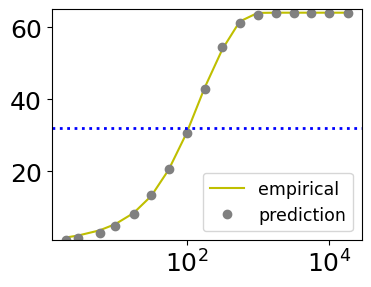

BiasedWalk4 mean=0.3287038401916238 std=0.028505786385602583
RandomWalk
[2.0000e+00 3.0000e+00 6.0000e+00 1.0000e+01 1.8000e+01 3.2000e+01
 5.6000e+01 1.0000e+02 1.8000e+02 3.2000e+02 5.6000e+02 1.0000e+03
 1.8000e+03 3.2000e+03 5.6000e+03 1.0000e+04 1.2785e+04]
func value a=196.98914973163082 b=0.11680440875828109 eff=0.16244549531583524
func value a=164.94196519336327 b=-0.004266478227665741 eff=0.19400763148714792
func value a=207.50031862229312 b=0.08251725083249055 eff=0.1542166306657518
func value a=166.25499393531567 b=-0.015456218131392554 eff=0.19247542129441322
func value a=160.78527592316624 b=-0.014047516563113935 eff=0.1990231992094332
func value a=166.9887373451078 b=-0.004384613116893071 eff=0.19162969017405707
func value a=139.08668587486002 b=-0.037565183042011376 eff=0.23007234516171626
func value a=140.18315340506564 b=-0.03841639172252409 eff=0.228272793290179
func value a=165.06679157551892 b=-0.004284189402005068 eff=0.19386091953789406
func value a=202.9836037534

In [1112]:
effs = get_ee_curve(exp_eff_dict6, 6)

In [1101]:
for _ in effs:
    print(_, np.mean(effs[_]), np.std(effs[_]))

Animals 0.3892544317540585 0.034622492591246314
TeAltOptions 0.33895449947910256 0.004865850732744152
BiasedWalk4 0.3287038401916238 0.028505786385602583
RandomWalk 0.19608357555463754 0.030442465508453552
Uncertainty 0.826130113968528 0.0377321393405876


In [1102]:
np.mean(effs['TeAltOptions'][:9]/effs['Animals']), np.std(effs['TeAltOptions'][:9]/effs['Animals'])/np.sqrt(len(effs['Animals'])-1)

(0.8787598134519738, 0.028664691230734948)

In [1103]:
np.mean(effs['BiasedWalk4'][:9]/effs['Animals']), np.std(effs['BiasedWalk4'][:9]/effs['Animals'])/np.sqrt(len(effs['Animals'])-1)

(0.8481895592522076, 0.027723688287243968)

In [1128]:
def func3(x, a, b): # the 2-parameter fit function for level 3
    z=x/a
    return 8*(1-1/(1+(z+b*z**2)/(1+b)))


def get_ee_curve3(ee_dict, le):
    assert le == 3
    f = func3
    N =  6
    effs = {}
    for model_name in ee_dict:
        print(model_name)
        plot_ = False #True if model_name in ['BiasedWalk4', 'Animals'] else False
        x, ytfs, y_mu, y_std = ee_dict[model_name]
        effs[model_name] = []
        print(x)
        for ytf in ytfs:
            a=70
            b=0.1
            ydata=ytf
            popt, pcov = curve_fit(f, x, ydata, p0=[a,b])
            a, b = popt[0], popt[1]
#             print("true vs predict", list(zip(ydata, f(x, popt[0], popt[1]))))
            if plot_:
                plt.figure(figsize=(4, 3))
                plt.plot(x, ydata, color=model_colors[model_name], linestyle='-', label='empirical')
                plt.plot(x, f(x, a, b), c='gray', marker='o', lw=0, label='prediction')
                plt.axhline(N, ls=':', c=model_colors['RandomWalk'], lw=2)
                plt.legend(loc='lower right', fontsize='x-small')
                plt.xscale('log')
                plt.ylim(1, 2**le+1)
                plt.show()
                plt.close()
            
            xs = np.linspace(10, 50, 40)
            y = f(xs, a, b)
            x_6 = xs[np.abs(y - N).argmin()]
            print(x_6, f(x_6, a, b)) # find what x, N corresponds to
            eff = N/x_6
            print(f"func value a={a} x_6={x_6} b={b} eff={eff}") # a is the number required to survey half nodes, x_6 to survey half           print(f"func value a={a} x_6={x_6} b={b} eff={eff}") # a is the number required to survey half nod
            effs[model_name].append(eff)
        effs[model_name] = np.array(effs[model_name])
        print(model_name, f'mean={np.mean(effs[model_name])} std={np.std(effs[model_name])}')
    return effs

In [1129]:
effs3 = get_ee_curve3(exp_eff_dict3, 3)

Animals
[   2.    3.    6.   10.   18.   32.   56.  100.  180.  320.  560. 1000.
 1455.]
20.256410256410255 5.957087102713089
func value a=9.194876620977439 x_6=20.256410256410255 b=0.3680247806242635 eff=0.29620253164556964
22.307692307692307 5.9828033516684425
func value a=9.919194379416995 x_6=22.307692307692307 b=0.3427403492340983 eff=0.26896551724137935
35.641025641025635 6.004984487210901
func value a=10.465831541916891 x_6=35.641025641025635 b=-0.04605358948440957 eff=0.16834532374100722
35.641025641025635 5.9538586183324576
func value a=6.842910370990116 x_6=35.641025641025635 b=-0.0949144159155754 eff=0.16834532374100722
25.384615384615383 6.037365993784291
func value a=10.382111946089147 x_6=25.384615384615383 b=0.2174752296619045 eff=0.2363636363636364
22.307692307692307 5.975728441905237
func value a=9.965277731746486 x_6=22.307692307692307 b=0.3465207259252753 eff=0.26896551724137935
23.333333333333332 5.959086472177942
func value a=10.155167518555842 x_6=23.3333333333333

In [1130]:
for _ in effs3:
    print(_, np.mean(effs3[_]), np.std(effs3[_]))

Animals 0.24482236390034076 0.043786256897533384
TeAltOptions 0.19118380655237413 0.011537914974010672
BiasedWalk4 0.1605805402681745 0.01181208048757696
RandomWalk 0.12000000000000002 2.7755575615628914e-17
Uncertainty 0.3249821479769227 0.018131704999623688


In [1134]:

np.mean(effs3['TeAltOptions'][:9]/effs3['Animals']), np.std(effs3['TeAltOptions'][:9]/effs3['Animals'])/np.sqrt(len(effs3['Animals'])-1)

(0.8163415924947839, 0.05168281398156708)

In [1135]:
np.mean(effs3['BiasedWalk4'][:9]/effs3['Animals']), np.std(effs3['BiasedWalk4'][:9]/effs3['Animals'])/np.sqrt(len(effs3['Animals'])-1)

(0.6890748710808061, 0.06764612591170613)

In [1136]:
np.mean(effs3['RandomWalk'][:9]/effs3['Animals']), np.std(effs3['RandomWalk'][:9]/effs3['Animals'])/np.sqrt(len(effs3['Animals'])-1)

(0.50997150997151, 0.03949338678327853)

In [332]:
import parameters as p

In [344]:
def animal_oi():
    # Compute distribution of end nodes visited for the 4-bias random walks
    le=6
    ln=list(range(2**le-1,2**(le+1)-1)) # list of node numbers in level le
    k=len(p.RewNames)
    Viw=[];Enw=[];Nuw=[]
    for nickname in p.RewNames+p.UnrewNamesSub:
        tf=LoadTrajFromPath('../../../newrosenberg/outdata/' + nickname+'-RW5-tf')
        cl=SplitModeClips(tf,ma) # find the clips
        ce=cl[np.where(cl[:,3]==p.EXPLORE)] # clips of exploration
        ne=np.concatenate([tf.no[c[0]][c[1]:c[1]+c[2],0] for c in ce]) # nodes excluding the last state in each clip
        ns=ne[np.isin(ne,ln)]
        _,Vis,_,_=hist(ns,xlabel='End node',ylabel='Number of visits',
            loc='upper left',bins=np.arange(2**le-1,2**(le+1))-0.5,xlim=[62.5,126.5])
        Num=np.sum(Vis)
        Ent=Entropy(Vis)
        Viw+=[np.array(Vis)]
        Enw+=[Ent]
        Nuw+=[Num]
#         print(nickname)
#         print('Nodes:   {:5.0f}'.format(Num))
#         print('Entropy: {:4.3f}'.format(Ent))
#         plt.show()
        plt.close()
    Viw=np.array(Viw)
    Enw=np.array(Enw)
    Nuw=np.array(Nuw)
    return Viw

In [349]:
Viw = animal_oi()
Vuw = Viw[len(p.RewNames):]

Viw.shape, Vuw.shape

((19, 64), (9, 64))

In [350]:
inner=np.array([75,76,77,78,87,88,89,90,99,100,101,102,111,112,113,114])-63
outer=np.array([63,65,71,73,95,97,103,105,106,109,110,121,122,125,126,124,94,92,86,84,83,80,79,68,67,64])-63
# v = joblib.load('../../Rosenberg-2021-Repository/outdata/NodePrefs1')

In [299]:
def get_oiratio(tfs):
    return [em.outside_inside_ratio(tf, re=False) for tf in tfs]

In [482]:
def get_oi():
    oi_dict = {}
    for model_name in model_colors:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
#         elif model_name in ['BiasedWalk4']:
#             Vuw = animal_oi()[len(p.RewNames):]
#             ratios = [np.mean(a[outer])/np.mean(a[inner]) for a in Vuw]
#             oi_dict[model_name] = ratios
        else:
            tfs = load(model_name)[:30]
            print("len(tfs)", len(tfs))
            oi_dict[model_name] = get_oiratio(tfs)
    return oi_dict

In [483]:
oi_ratios_dict = get_oi()

Animals
len(tfs) 9
Agent: Ratio of visits to outer vs inner leaf nodes = 2.233, with entropy = 5.703
Agent: Ratio of visits to outer vs inner leaf nodes = 2.574, with entropy = 5.719
Agent: Ratio of visits to outer vs inner leaf nodes = 2.694, with entropy = 5.514
Agent: Ratio of visits to outer vs inner leaf nodes = 1.763, with entropy = 5.751
Agent: Ratio of visits to outer vs inner leaf nodes = 1.924, with entropy = 5.698
Agent: Ratio of visits to outer vs inner leaf nodes = 1.643, with entropy = 5.766
Agent: Ratio of visits to outer vs inner leaf nodes = 1.852, with entropy = 5.720
Agent: Ratio of visits to outer vs inner leaf nodes = 2.542, with entropy = 5.670
Agent: Ratio of visits to outer vs inner leaf nodes = 3.487, with entropy = 5.644
TeAltOptions
len(tfs) 30
Agent: Ratio of visits to outer vs inner leaf nodes = 3.067, with entropy = 5.686
Agent: Ratio of visits to outer vs inner leaf nodes = 2.329, with entropy = 5.724
Agent: Ratio of visits to outer vs inner leaf nodes = 

In [491]:
del oi_ratios_dict['RandomWalk']

In [362]:
oi_ratios_dict.keys()

dict_keys(['Animals', 'TeAltOptions', 'BiasedWalk4', 'RandomWalk', 'Uncertainty'])

In [374]:
from scipy.stats import sem

Animals
mean_ratio 2.3014239785230157 (±) 0.5542986682281033 0.19597417355338206
TeAltOptions
mean_ratio 2.5708173766265716 (±) 0.2514214937583625 0.08380716458612081
BiasedWalk4
mean_ratio 1.9676074821492284 (±) 0.18749144942782162 0.06628823765245365
Uncertainty
mean_ratio 1.0010687343654923 (±) 0.10977730538363095 0.03659243512787698


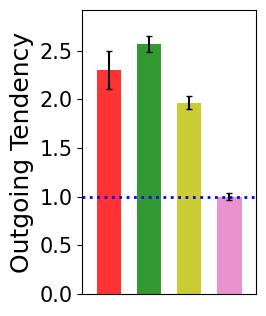

In [1180]:
plt.figure(figsize=(3, 3.5))
ax = plt.gca()

for i, model_name in enumerate(oi_ratios_dict):
    print(model_name)
    ratios = oi_ratios_dict[model_name][:10]
    jitter = np.random.uniform(-0.05, 0.05, size=len(ratios))
#     plt.plot(i+jitter, ratios, c=model_colors[model_name], marker='.', linestyle='none', markersize=10, alpha=1, label=model_name)
    mean_ratio = np.mean(ratios)
    print("mean_ratio", mean_ratio, '(±)', np.std(ratios), sem(ratios))
    plt.bar(i/2, mean_ratio, yerr=sem(ratios), color=model_colors[model_name], width=0.3, capsize=2, alpha=0.8, label=labels[model_name])

plt.axhline(1, ls=':', c=model_colors['RandomWalk'], lw=2, label='random')
plt.xticks([])
ax.tick_params(axis='both', labelsize='small')
plt.ylabel('Outgoing Tendency', fontsize='medium')
# plt.legend(loc='upper right', fontsize='x-small')
plt.margins(0.1)
plt.tight_layout()
# plt.savefig(f'{figpath}/oiratio.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [12]:
from collections import defaultdict

In [13]:
def get_firstnode(tfs):
    dicts = [em.first_endnode_label(tf) for tf in tfs]
    merged = defaultdict(list)
    for d in dicts:
        for k, v in d.items():
            merged[k].append(v)
    return merged

def get_firstnode_dict():
    firstnode_dict = {}
    for model_name in model_colors:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        elif model_name in ['Animals']:
            with open(p.OUTDATA_PATH + 'first_endnode_label_unrewarded.pkl', 'rb') as f:
                first_endnode_label_animal = pickle.load(f)
            firstnode_dict[model_name] = first_endnode_label_animal
        else:
            tfs = load(model_name)[:10]
            print("len(tfs)", len(tfs))
            firstnode_dict[model_name] = get_firstnode(tfs)
    return firstnode_dict

In [16]:
firstnode_dict = get_firstnode_dict()
del firstnode_dict['RandomWalk']

Animals
TeAltOptions
len(tfs) 10
BiasedWalk4
len(tfs) 9
Uncertainty
len(tfs) 10
RandomWalk
len(tfs) 10


In [489]:
import matplotlib.ticker as mtick

Animals str 62.314\% \pm 3.504\%
Animals opp 8.391\% \pm 1.152\%
Animals bent 22.992\% \pm 2.414\%
Animals opp
bent 6.306\% \pm 1.079\%
TeAltOptions str 72.649\% \pm 0.431\%
TeAltOptions opp 10.605\% \pm 0.294\%
TeAltOptions bent 12.421\% \pm 0.368\%
TeAltOptions opp
bent 4.323\% \pm 0.169\%
BiasedWalk4 str 47.227\% \pm 1.185\%
BiasedWalk4 opp 19.278\% \pm 0.496\%
BiasedWalk4 bent 24.12\% \pm 0.439\%
BiasedWalk4 opp
bent 9.377\% \pm 0.566\%
Uncertainty str 25.781\% \pm 1.312\%
Uncertainty opp 24.037\% \pm 1.706\%
Uncertainty bent 23.704\% \pm 0.643\%
Uncertainty opp
bent 26.48\% \pm 1.59\%


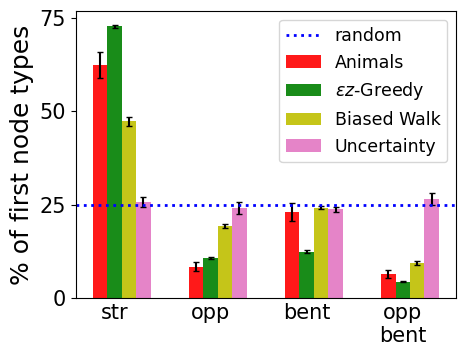

In [20]:
import matplotlib.image as mpimg
from scipy.stats import sem


fig = plt.figure(figsize=(5, 3.9))
ax = plt.gca()

for m, model_name in enumerate(firstnode_dict):
    values_dict = firstnode_dict[model_name]
    new_values_dict = {'str': values_dict['straight'], 'opp': values_dict['opposite straight'], 'bent': values_dict['bent straight'], 'opp\nbent': values_dict['opposite bent straight']}
    for i, t in enumerate(new_values_dict):
        data = np.array(new_values_dict[t])
        print(model_name, t, f'{round(np.mean(data), 3)}\% \pm {round(sem(data), 3)}\%')
        plt.bar(i+m*0.15, np.mean(data), color=model_colors[model_name], yerr=sem(data), 
               label=labels[model_name] if i == 0 else '', capsize=2, width=0.15, alpha=0.9)

plt.axhline(25, c=model_colors['RandomWalk'], ls=':', lw=2, label=labels['RandomWalk'])

ax.legend(fontsize='x-small')
ax.set_ylabel('% of first node types', fontsize='medium')
ax.set_yticks([0, 25, 50, 75])
ax.set_xticks(np.arange(len(new_values_dict))+0.15, list(new_values_dict.keys()))
ax.tick_params(axis='x', labelsize='small', length=0)
ax.tick_params(axis='y', labelsize='small')
plt.tight_layout()

# plt.savefig(f'{figpath}/firstnodeall.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

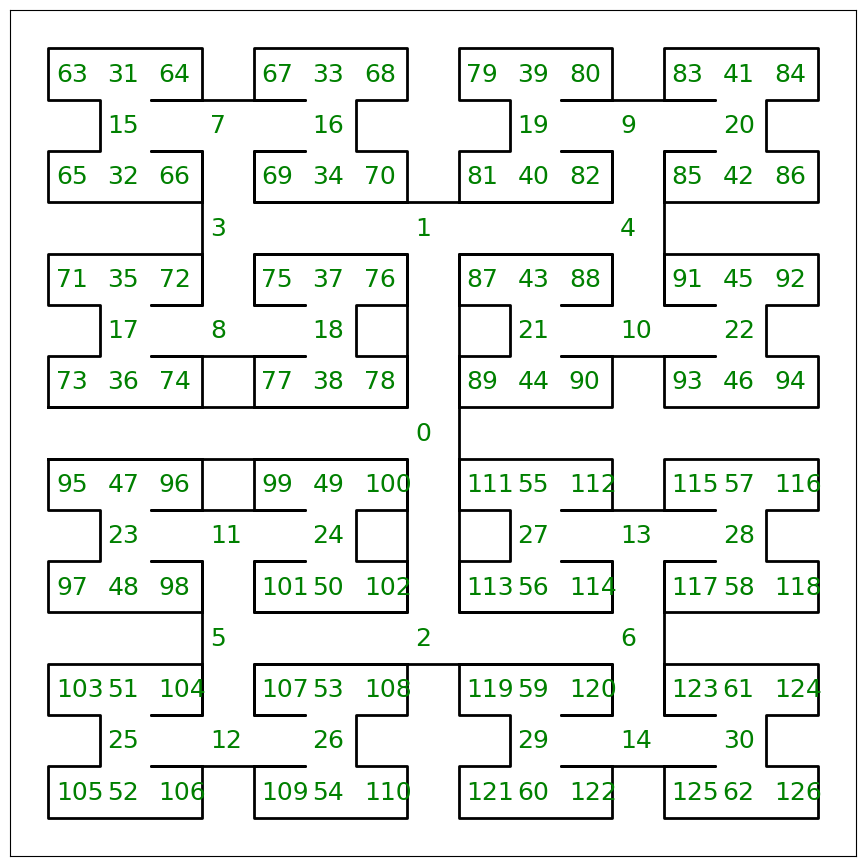

In [670]:
PlotMazeFunction([0]*127, NewMaze(), figsize=9, numcol='g', mode='nodes')
plt.savefig(f'{figpath}/mazenodes.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [758]:
UnrewNamesSub

['B5', 'B6', 'B7', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9']

In [1182]:
model_colors['mouse B5'] = model_colors['Animals']
model_colors['mouse D3'] = model_colors['Animals']

In [775]:
def nodebias(tr, ma):
    tu = TallyNodeStepTypes(tr,ma)
    n = 2**ma.le-1 # number of nodes below end node level
    bl = tu[:n,0]/(tu[:n,0]+tu[:n,1]) # inleft/(inleft+inright)
    sl = np.sqrt(tu[:n,0]*tu[:n,1]/(tu[:n,0]+tu[:n,1])**3) # std dev
    return bl, sl

def get_nodebias_dict(model_names):
    nodebias_d = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal', 'RandomWalk', 'Animals']:
            continue
        elif model_name in ['mouse B5']:
            bl, sl = nodebias(LoadTrajFromPath('../outdata/B5-tf'), ma)
        elif model_name in ['mouse D3']:
            bl, sl = nodebias(LoadTrajFromPath('../outdata/D3-tf'), ma)
        else:
            tf = load(model_name)[0]
            bl, sl = nodebias(tf, ma)
        nodebias_d[model_name] = (bl, sl)
    return nodebias_d

In [1163]:
def plot_percent_turns(model_names, filename):

    plt.figure(figsize=(11, 4))
    for m in model_names:
        bl, sl = nodebias_dict[m]
        plt.errorbar(range(len(bl)), bl, yerr=sl, c=model_colors[m], linewidth=1.5, label=labels.get(m, m))

    plt.axhline(0.5, lw=1.5, ls=':', c=model_colors['RandomWalk'], label=labels['RandomWalk'])
    plt.title('Spatial distribution of left-right bias', fontsize='medium')
    plt.legend(loc='lower left', fontsize='x-small')
    plt.xlabel('Node', fontsize='medium')
    plt.ylabel('left/(left+right)', fontsize='medium')
    plt.tick_params(axis='both', labelsize='small')
    plt.grid(alpha=0.3)
    plt.ylim(0, 1)
    plt.tight_layout()
    
    plt.savefig(f'{figpath}/{filename}', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()
    return

In [1164]:
# nodebias_dict = get_nodebias_dict(model_colors)

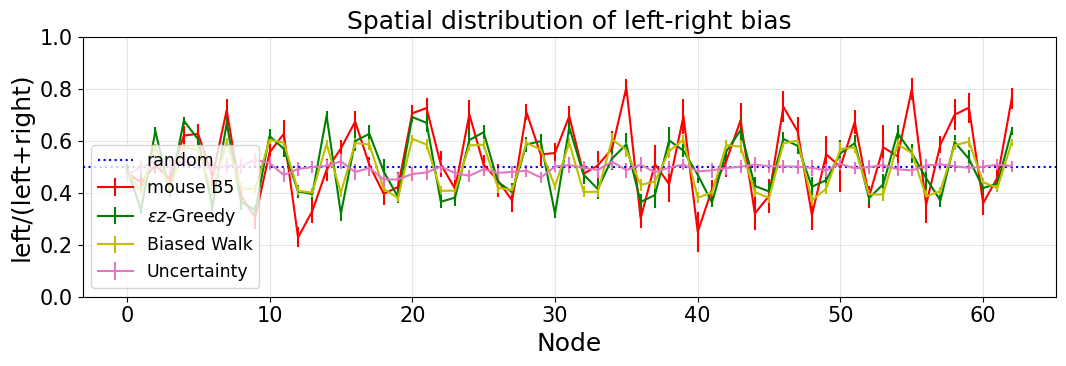

In [1183]:
plot_percent_turns(['mouse B5', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty'], filename='nodebias_b5.pdf')

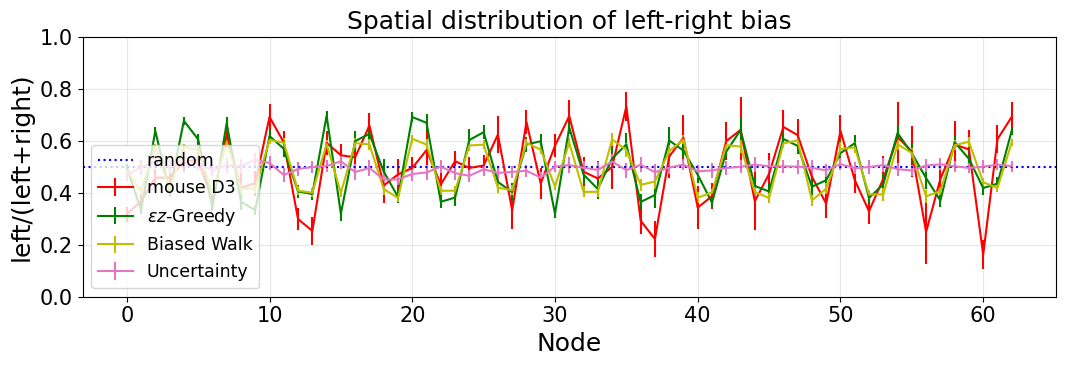

In [1184]:
plot_percent_turns(['mouse D3', 'TeAltOptions', 'BiasedWalk4', 'Uncertainty'], filename='nodebias_d3.pdf')